# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt

#загрузим таблицу и получем информацию о ней
data_real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data_real_estate.head(5))
print(data_real_estate.info())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [2]:
#посмотрим количество населеных пунктов охваченных иследованием
print(len(data_real_estate['locality_name'].unique()))
#посмотрим список населенных пунктов
data_real_estate['locality_name'].unique()

365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### В таблице имеется 22 столбца и 23699 объявлений о продаже квартир, в разных столбцах разное количество значенний non-null - следовательно имеются пропущенные значения, разные типы данных. булев тип -2, вешественное число -14, целое -3 и текстовые -3. Всего используются данные по 365 населенным пунктам. 

### Шаг 2. Предобработка данных

In [3]:
#проверяем наличие пропусков в столбцах
print(data_real_estate.isnull().sum())
#в таблице имеются пропуски в столбцах: высота потолков, всего этажей в доме, жилая площадь, аппартаменты, площадь кухни, балкон,
#название населеного пунктаб растояние до центра, аэропорта, парка и водоема, количество парков и водоемов 

#название населеного пункта важный показатель для проведения анализа, без этого показатнеля не возможно установить взаимосвязь 
#цены и расположения, в полученой таблице малое количество пропусков (49) удалим их
data_real_estate.dropna(subset = ['locality_name'], inplace = True)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [4]:
#посмотрим связь наличия пропусков и населеного пункта
data_real_estate.query('locality_name != "Санкт-Петербург"').isnull().sum()


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          3543
floors_total              15
living_area              758
floor                      0
is_apartment            7002
studio                     0
open_plan                  0
kitchen_area             890
balcony                 3801
locality_name              0
airports_nearest        5449
cityCenters_nearest     5450
parks_around3000        5449
parks_nearest           7149
ponds_around3000        5449
ponds_nearest           6827
days_exposition         1097
dtype: int64

#### наблюдаем, что основная масса пропусков по растоянию до центра, аэропорта, парка и водоема и количество парков и водоемов приходятся не на Санкт-Петербург, а на более мелкие населенные пукты и так как эти столбы имеют значительное влияние на анализ только для Санкт-Петербурга то оставим их незаполнеными

In [5]:
#проверим распределение высоты потолков
print(data_real_estate['ceiling_height'].describe())
# заполним пропуски медианными значениями
data_real_estate['ceiling_height'] = data_real_estate['ceiling_height'].fillna(data_real_estate['ceiling_height'].median())


count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


#### в следствии того, что высота потолков в диапозоне от 25% до 75% колеблится в достаточно малых значениях и  имеют в большей массе стандартные значения (хотя прсутствуют выбросы min = 1 max = 100) заполним пропуски медианными значениями

In [6]:
#показатель наличия балкона может отсутствовать в следствии отсутствия балкона - заменинм протуски на нулевые значения
data_real_estate['balcony'] = data_real_estate['balcony'].fillna(0)

In [7]:
# посмотрим показатель количество этажей в здании
d=data_real_estate.pivot_table(index=['locality_name'], values='floors_total', aggfunc=('mean', 'min', 'max','median'))
print(d.head(10))
# удалим строки с пропусками
data_real_estate.dropna(subset = ['floors_total'], inplace = True)

                max      mean  median  min
locality_name                             
Бокситогорск    5.0  4.187500     5.0  3.0
Волосово        5.0  4.555556     5.0  1.0
Волхов          9.0  4.855856     5.0  2.0
Всеволожск     23.0  8.391960     9.0  2.0
Выборг         15.0  5.873418     5.0  2.0
Высоцк          5.0  3.750000     4.5  1.0
Гатчина        18.0  5.700326     5.0  2.0
Зеленогорск     9.0  4.250000     4.0  1.0
Ивангород       9.0  4.892857     5.0  2.0
Каменногорск    5.0  4.538462     5.0  2.0


#### количество этажей в здании параметр влияющий на анализ зависимости от расположения недвижимости на последнем этаже, разброс количества этажей не позволяет достоверно заполнить пропуск и учитывая их малое количество удалим строки с пропусками

In [8]:
# заполним пропуски в жилой площади и площади кухни на основе медианных значений в зависимости от количества комнат в квартире   
data_real_estate['living_area'].fillna(data_real_estate.groupby('rooms')['living_area'].transform('median'), inplace=True) 
data_real_estate['kitchen_area'].fillna(data_real_estate.groupby('rooms')['kitchen_area'].transform('median'), inplace=True)
data_real_estate.isnull().sum()
data_real_estate.query('rooms == 0')
# по столбцу площадь кухни стались пропуски, при этом все они встречаются по Санкт Петербургу и соответсквует количеству
# комнат = 0. Можно предположить, что имеем дело со студиями, и принять параметр за 0
data_real_estate['kitchen_area'] = data_real_estate['kitchen_area'].fillna(0)

In [9]:
# параметр растояние до центра имеет значение только для Санкт-Петербурга попробуем максимально заполнить пропуски
# медианными значениями в соответствии с населенными пунктами
data_real_estate['cityCenters_nearest'].fillna(data_real_estate.groupby('locality_name')['cityCenters_nearest'].transform('median'), inplace=True) 
# проверим результат
data_real_estate.isnull().sum()
data_real_estate.query('locality_name == "Санкт-Петербург"').isnull().sum()
# видим по Санкт-Петербургу пропуски заполнены и учитывая малое их количеству по городу нас это устроит, по другим снижение
#количества пропусков незначительно заполним оставшиеся пропуски на 0 так как в дальнешем данные по ним использовать не будем
data_real_estate['cityCenters_nearest'] = data_real_estate['cityCenters_nearest'].fillna(0)
data_real_estate.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest         0
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [10]:
# в столбце "сколько дней было размещено объявление" наблюдаем пропуски, вероятно на момент получения 
#информации объявление небыло снято. применим для них индикаторные значения (-1)
data_real_estate['days_exposition'] = data_real_estate['days_exposition'].fillna(-1)

In [11]:
# переведем значения в столбце first_day_exposition в формат даты 
data_real_estate['first_day_exposition'] = pd.to_datetime(data_real_estate['first_day_exposition'],
                                                          format='%Y.%m.%dT%H:%M:%S')

In [12]:
#расмотрим типы данных. заменим тип вещественное число на целое 
data_real_estate['last_price'] = data_real_estate['last_price'].astype('int')
data_real_estate['floors_total'] = data_real_estate['floors_total'].astype('int')
data_real_estate['total_area'] = data_real_estate['total_area'].astype('int')
data_real_estate['balcony'] = data_real_estate['balcony'].astype('int')
data_real_estate['living_area'] = data_real_estate['living_area'].astype('int')
data_real_estate['kitchen_area'] = data_real_estate['kitchen_area'].astype('int')
data_real_estate['days_exposition'] = data_real_estate['days_exposition'].astype('int')
data_real_estate['cityCenters_nearest'] = data_real_estate['cityCenters_nearest'].astype('int')

#### заменим тип данных в столбцах которые подразумевают парамертры в целых числах без дробной части


#### При расмотрении таблицы можно заметить наличие пропусков во многих столбцах, данные из которых могут применятся в расчетах: высота потолков, всего этажей в доме, жилая площадь,  аппартаменты, площадь кухни, балкон, название населеного пункта, растояние до центра, аэропорта, парка и водоема, количество парков и водоемов.
####   Высота потолков обычно имеет стандартные значения в определенном промежутке поэтому заменим пропуски на значения медианы. Количество этажей в доме имеет значение для определения расположения квартиры на последнем или другом этаже, учитывая малое количество пропуско (86), данными в этих строках можно пожертвовать и удалить строки с пропусками. 
####   Аналогично с названием населеного пункта - без этих данных невозможно установить взаимосвязь между населенным пунктом и продажей квартиры и учитывая малое количество (49) также удалим строки с пропусками.  
####   Значения используемые для замены пропусков в столбцах указывающих жилую площадь и площадь кухни заполним медиаными значениями на основе группировки по количеству комнат в квартире предполагая, что квартиры со схожим количеством комнат имеют схожее соотношение площадей помещений. При этом в данном случае осталось 196 не заполненых значений, при просмотре замечено, что эти пропуски соответствуют количеству комнат = 0, возможно владельцы по какой то причине не разделяли квартиру на комнаты и другие помещения, как вариант студия или комунальная квартира - заменим оставшиеся пропуски на 0. 
####   Растояние до центра были получены автоматически на основе картографических данных. возникновение пропусков можно объяснить указание адреса в неправильном формате или с ошибками. Заменим, основываясь на значениях медианы по группам сформированным по названию населенного пункта, заполним пропускию После заполения осталось значительное количество пропусков относящихся к другим населеным пунктам (относительно Санкт-Петербурга), вероятно для этих поселений данный параметр не расчитывался и приниматся в расчет в дальнейшем не будет - заменим остаток на 0. 
####   Столбец с информацией о количестве размещения объявления до снятия содержит пропуски вероятно вследствии того, что на момент формирования данных продажа квартиры не состоялась, для использования столбца в расчетах заменим пропуски на медиану.
 

### Шаг 3. Посчитайте и добавьте в таблицу

In [13]:
# посчитаем и добавим в таблицу цену квадратного метра
data_real_estate['price_meter'] = data_real_estate['last_price'] / data_real_estate['living_area']
data_real_estate['price_meter'] = data_real_estate['price_meter'].astype('int')

In [14]:
# добавим день недели, месяц и год публикации объявления
data_real_estate['data'] =  data_real_estate['first_day_exposition'].dt.strftime('%w%m%Y')
data_real_estate['data'] = data_real_estate['data'].astype('int')

In [15]:
#  добавим столбец этаж квартиры; варианты — первый, последний, другой
try:
    def name_floor(row):
        floor = row['floor']
        floor_total = row['floors_total']
        if floor == 1:
            return 'первый'
        if floor == floor_total:
            return 'последний'
        else:
            return 'другой'
    #применим функцию к словарю
    data_real_estate['floor_name'] = data_real_estate.apply(name_floor, axis=1)
except:
    print('Столбец этажи не добавился')

In [16]:
# добавим столбецы соотношение жилой и общей площади, а также отношение площади кухни к общей 
data_real_estate['ratio_living'] = data_real_estate['living_area'] / data_real_estate['total_area']
data_real_estate['ratio_kitchen'] = data_real_estate['kitchen_area'] / data_real_estate['total_area']

### Шаг 4. Проведем исследовательский анализ данных и выполним инструкции:

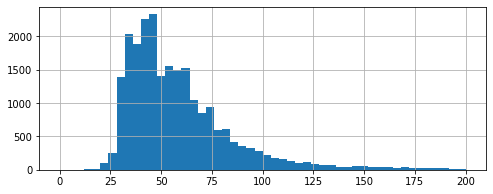

In [17]:
# построим гистограму основаную на даных о площади квартир
data_real_estate['total_area'].hist(bins=50, figsize = (8,3), range = (0,200))

#### можно заметить, что основная масса квартир имеет площадь от 30 до 75 квадратных метров, наиболее распостранена площадь 40-45 кв.м.

6540058.260004244


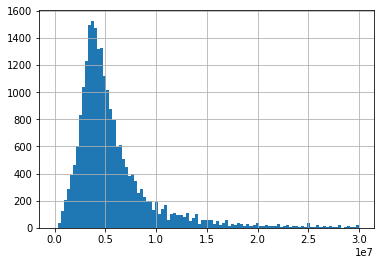

In [18]:
# построим гистограму основаную на данных о цене квартир
print(data_real_estate['last_price'].mean())
data_real_estate['last_price'].hist(bins=100, range = (0,30000000))

#### видим, что наиболее распостранены предложения со стоимостью квартиры в диапазоне от 2 млн. до 7,5 млн. рублей 

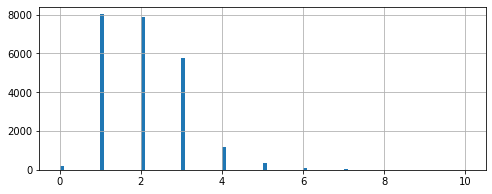

In [19]:
# построим гистограму основаную на данных о числе комнат в квартирах
data_real_estate['rooms'].hist(bins=100, figsize = (8,3), range = (0,10))

#### в объявлениях о продаже в основном представленны одно- и двух- комнатные квартиры, достаточно большое предложение трехкамнатных квартир, далее наблюдается резкий спад предложения с увеличением количества комнат

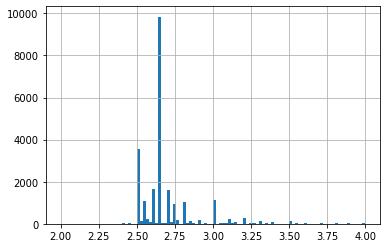

In [20]:
# построим гистограму основаную на данных о высоте потолков в квартирах
data_real_estate['ceiling_height'].hist(bins = 100, range = (2,4) )

#### построеная гистограмма указывает, что высота потолков в большинстве квартир находится около 2.65 метров, достаточно заметную часть составляет высота около 2,5 метра (вероятно квартиры в старых постройках), с увеличением высоты потолков количество предложений уменьшается


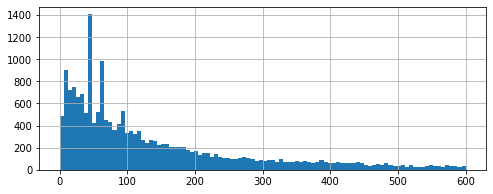

In [49]:
# отсортируем по столбцу срок размещения исключив индикаторные значения
data = data_real_estate.query('days_exposition != -1') 
# построим гистограму основаную на данных о времени продажи квартир
data['days_exposition'].hist(bins=100, figsize = (8,3),  range = (0,600))

In [47]:
# посмотрим средние и медианные значения для данных о времени продажи кварти
data['days_exposition'].describe()


count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### на основании построиной гистограммы и полученных средних и медианых значений, можно утверждать, что в среднем продажа квартиры занимает 180 дней. Основная масса квартир продается в период от 45 до 231 дня. Если взять во внимание значение медианы, то предполагается, что самое рапостраненный срок продажи 95 дней. При сроке продажи менее 45 суток можно сказать, что продажа прошла необычно быстро, а при сроке более 231 суток - необычно долго


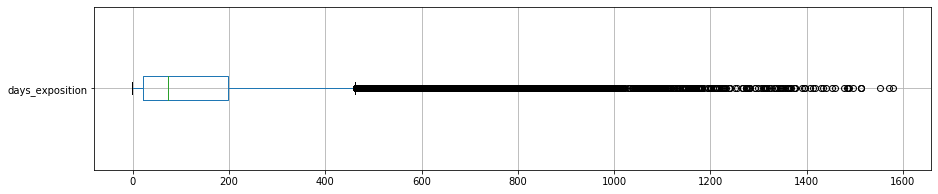

In [23]:
# построим диаграмму размаха
data_real_estate.boxplot('days_exposition', vert=False, figsize=(15,3))

#### постороив диаграмму размаха можно отсечь редкие и выбивающиеся значения в сроке продажи. Так мы видим, что значения заслуживающие внимания находятся в диапазоне от 0 до 425 дней. То что правее правого уса можно принят за выбросы и редко встречающиеся данные. Среднее тяготеет к левой стороне и ориентировочно приходится на 100 дней.

In [24]:
# иследуем наличие зависимости цены от квадратного метра (площади квартиры)
data_real_estate['last_price'].corr(data_real_estate['total_area'])

0.6535994047960907

In [25]:
# иследуем наличие зависимости цены от количества комнат 
data_real_estate['last_price'].corr(data_real_estate['rooms'])

0.3631905485065748

In [26]:
# иследуем наличие зависимости цены от растояния до центра
data_real_estate['last_price'].corr(data_real_estate['cityCenters_nearest'])

-0.048136599487533134

In [27]:
# иследуем наличие зависимости цены от расположения квартиры на этаже
# создадим словарь
data_floors = data_real_estate[['last_price','floor_name']]

try:
    def floor(row):
        name = row['floor_name']
        if name == 'первый':
            return 0
        if name == 'последний':
            return 1
        if name == 'другой':
            return 2

    data_floors['floor_number'] = data_floors.apply(floor, axis=1)
except:
    print('Словарик не создался')

data_floors['last_price'].corr(data_floors['floor_number'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0.04124720981991685

In [28]:
# иследуем наличие зависимости цены от дня недели, месяца и года подачи объявления
data_real_estate['last_price'].corr(data_real_estate['data'])

0.009310330384548976

#### Иследовав зависимость цены от ряда факторов можно утверждать, что наибольшее влияние оказывает площадь квартиры - 0,65, количество комнат оказывает менее сильное влияние - 0,36, удаление от центра имеет отрицательное значение корреляции (с удалением цена снижается) и оказыват малое влияние на цену (-0,04), расположение на этаже и дата подачи объявления оказывают низкое влияние на цену продажи окола нуля - 0,04 и ,009 соответственно

In [29]:
# Выберtv 10 населённых пунктов с наибольшим числом объявлений.
data_locality_name_pivot = data_real_estate.pivot_table(index = 'locality_name',
                                                        values = 'total_area', aggfunc = 'count')
data_locality_name_pivot.columns = ['count_name']
data_locality_top10 = data_locality_name_pivot.sort_values(by = 'count_name', 
                                                           ascending = False).head(10)
data_locality_top10

,count_name
locality_name,
Санкт-Петербург,15651
посёлок Мурино,520
посёлок Шушары,439
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
деревня Кудрово,299


In [30]:
# Посчитаtv среднюю цену квадратного метра в этих населённых пунктах. 
data_index_city=data_locality_top10.index
data_mean_price = data_real_estate.pivot_table(index = 'locality_name', values = 'price_meter', 
                                               aggfunc = 'mean')
city_choice = data_mean_price.query('index in @data_index_city')
print(city_choice.sort_values(by = 'price_meter', ascending = False))
        

                     price_meter
locality_name                   
Санкт-Петербург    221660.601687
посёлок Парголово  201469.339450
Пушкин             194322.823848
деревня Кудрово    189613.906355
посёлок Мурино     177886.507692
посёлок Шушары     157348.375854
Всеволожск         135187.856784
Колпино            133398.423077
Гатчина            122932.846906
Выборг             100482.118143


#### По цене кв.м. в населенных пунктах с наибольшим количеством объявлений заметно, что разброс цен лежит в диапазоне от 100 тр.р до 221 т.р . Наиболшая средняя цена за кв.м приходится на СПБ

In [31]:
# Выделим квартиры в Санкт-Петербурге
data_SPB = data_real_estate.query('locality_name == "Санкт-Петербург"')


In [32]:
# Создадим столбец с расстоянием до центра в километрах, округлим до целых значений.
data_SPB['cityCenters_nearest_km'] = (data_SPB['cityCenters_nearest'] / 1000).round()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
#  Посчитаем среднюю цену для каждого километра
data_SPB_price_km = data_SPB.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price',
                                         aggfunc = 'mean')


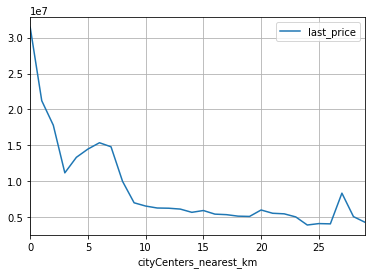

In [34]:
# Построим график показывающий, как цена зависит от удалённости от центра.
data_SPB_price_km.plot( grid=True)

### Основываясь на графики показывающим зависимость цены от растояния квартиры до центра можно предположить, что границы центральной зоны сотавляют около 3 км, так как  за границами этой зоны зависимость выражена менее значимо чем внутри 3 километровой зоны

In [35]:
### Выделим сегмент квартир в центре. 
data_SPB_centr = data_SPB.query('cityCenters_nearest_km <= 3')


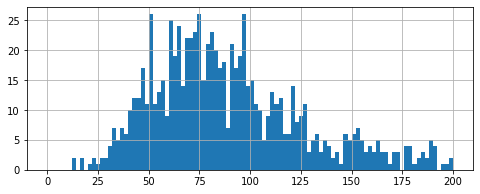

In [36]:
# построим гистограму основаную на данных о площади квартир
data_SPB_centr['total_area'].hist(bins=100, figsize = (8,3), range = (0,200))

#### на основании гистограммы видно, что подавляющая часть квартир имеет площадь от 35 до 115 кв.м. с росом площади количество предложений плано снижается

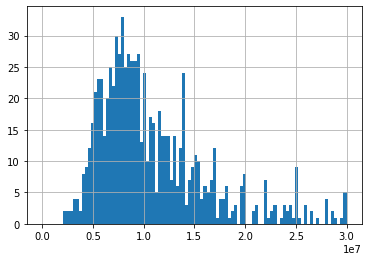

In [37]:
# построим гистограму основаную на данных о цене квартир
data_SPB_centr['last_price'].hist(bins=100, range = (0,30000000))

#### по предсталеной гистограмме видно, что основная цасть квартир имеет цену в диапазоне от 4 млн. до 10 млн. рублей, хотя присутствует заметный сегмент с ценой от 10 до 15 млн. рублей

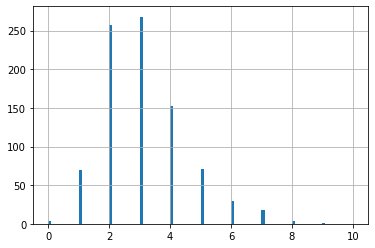

In [38]:
#  построим гистограму основаную на данных о количестве комнат квартирах
data_SPB_centr['rooms'].hist(bins=100, range = (0,10))

#### в основном к продаже предсталены  трех- комнатные квартиры, чуть меньше двух- комнатные заметную часть составляют четырех комнатные, одно- и пяти комнатные представлены примерно в одинаковом количестве и небольшом объеме, количество квартир с большим количеством комнат заметно ниже

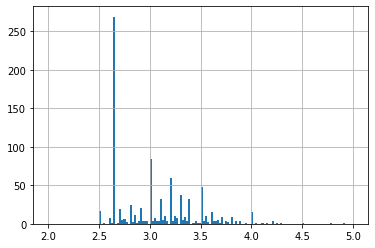

In [39]:
#  построим гистограму основаную на данных о высоте поталков в квартирах
data_SPB_centr['ceiling_height'].hist(bins=150, range = (2,5))

#### подавляющее количество квартир имеет высоту потолка окола 2,70 метра, заметной количество имеет высоту около 3 метров

In [40]:
# иследуем наличие зависимости цены от количества комнат в квартире
data_SPB_centr['last_price'].corr(data_SPB_centr['rooms'])

0.2405063465459433

In [41]:
# иследуем наличие зависимости цены от квадратного метра (площади квартиры)
data_SPB_centr['last_price'].corr(data_SPB_centr['total_area'])

0.566042375078204

In [42]:
# иследуем наличие зависимости цены от расположения квартиры на этаже
# создадим словарь
data_floors = data_SPB_centr[['last_price','floor_name']]

try:
    def floor(row):
        name = row['floor_name']
        if name == 'первый':
            return 0
        if name == 'последний':
            return 1
        if name == 'другой':
            return 2

    data_floors['floor_number'] = data_floors.apply(floor, axis=1)
except:
    print('Столбец в словарик не добавился')

data_floors['last_price'].corr(data_floors['floor_number'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0.07174315059344324

In [43]:
# иследуем наличие зависимости цены от удалености от центра
data_SPB_centr['last_price'].corr(data_SPB_centr['cityCenters_nearest_km'])

-0.17999554734111928

In [44]:
# иследуем наличие зависимости цены от дня недели, месяца и года подачи объявления
data_SPB_centr['last_price'].corr(data_real_estate['data'])

-0.004029816204527938

#### Иследовав зависимость цены от ряда факторов можно утверждать, что наибольшее влияние оказывает площадь квартиры - 0,56, количество комнат оказывает менее сильное влияние - 0,24, удаление от центра имеет отрицательное значение корреляции (с удалением цена снижается) и оказыват малое влияние на цену (-0,18), расположение на этаже и дата подачи объявления оказывают низкое влияние на цену продажи окола нуля - 0,07 и -0,004 соответственно

### Сравнивая данные по центральной части Санкт-Петербурга и данными по продаже квартир в целом по региону можно вделать следующие выводы
#### По площади предлагаемых квартир в регионе от 30 до 75 кв.м. в центральной части СПБ 35-115 кв.м., что показывае на больший выбор предложений к продаже с различной площадью
#### по количеству комнат: усли в регионе в основном к продаже представлены одно и двух комнатные квартиры с заметным сектором из трехкомнатных квартир, то в цетральной части СПБ предложения тяготеют к трех комнатным и чуть меньше двух комнатным квартирам с заметным числом предложений одно и четырех комнатных.
#### По высоте потролков в целом в регионе и центре СПБ значения совподают - около 2,65 метра, однако в регионе наблюдается всплеск около значения 2,5 метра, а в центре около 3 метров.
#### Иследуя зависимость цены от различных факторов заметим, что соотношение имеют схожие влияние хотя величины несколько отличаются: площадь квартиры 0,65 и 0,56; количество комнат 0,36 и 0,24; удаление от центра -0,04 и -0,18; расположение на этаже 0,07 и 0,028; дата подачи объявления 0,009 и -0,004 для региона и центальной части СПБ соответственно.


### Шаг 5. Общий вывод
### На основании проведеного иследования по данным о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет можно сделать следующие выводы:
#### В данных представлена информация по объектам недвижимости по 365 населеным пунктам. Имеющаяся информация по ним представляет различную ценность для проведения анализа в разрезе по населеным пунктам. Так информация о растоянии до центра СПБ для населенных пунктов отличных от Санкт-Петербурга не имеет ценности, а для самого СПБ необходима для принятие во внимание.
#### В таблице представлена информация по площадям и количеству комнат жилого фонда и можно заметить, что наибольшее влияние имеет площадь квартиры, а количество комнат менее значительно влияет на цену продажи 0,65 и 0,36 для региона в целом и 0,56 и 0,24 для центральной части СПБ. Расположение на этаже и дата продачи объявления о продаже практически не оказывает влияние на ценообразование хотя и имеют различие в значениях для региона и центра СПБ: 0,04 и 0,009 против 0,007 и -0,004 соответственно. Растояние от центра СПБ наиболее сильно проявляют себя имено в центральной части СПБ по сравнению с регионом в целом: -0,076 и -0,18 соответственно. Хотя это влияние проявляется очень слабо. 
#### По цене кв.м. в населенных пунктах с наибольшим количеством объявлений заметно, что разброс цен лежит в диапазоне от 100 тр.р до 221 т.р . Наиболшая средняя цена за кв.м приходится на СПБ
#### По предложению квартир с различным каоличеством комнат заметно, что основная масса состоит из одно- двух- трех- и четырех- комнатных квартир. При этом в регионе преобладают одно- и двух- комнатные, а в центральной части СПБ двух- и трех- комнатные квартиры.
####  По высоте потолков среднее около 2,65 метра с заметным количеством предложений для региона 2,5 метра, а для центра СПБ 3 метра.
####  По срокам продажи видно, что в среднем квартира продается за 180 дней, хотя наличествуют результаты от одного дня и присутствуют выброся с количеством дней продажи более 400.
####  Результаты данного анализа возможно применить для прогнозирования цены продажи квартиры в зависимости от параметров и расположения. Например для предложению автоматического расчета цены продажи при подаче объявления на сайте по работе с недвижимостью. Также при расмотрении объктов недвижимости можно будет выявить явно нестандартные ожидания продавцов на фоне предложения.
  
  
 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод